In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import os
os.listdir()

['Untitled.ipynb',
 'Telecom_churn_modelling.ipynb',
 'churn_preidiction.csv',
 '.ipynb_checkpoints']

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import display,HTML

In [5]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,roc_auc_score

In [6]:
data=pd.read_csv("churn_preidiction.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
data.drop(['phone number'],axis=1,inplace=True)

In [8]:
data.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
print("All the data types",data.dtypes)

All the data types state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [10]:
print("The count of the diferent data types are ",data.dtypes.value_counts())

The count of the diferent data types are  float64    8
int64      8
object     3
bool       1
dtype: int64


In [11]:
data.dtypes.keys()

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [12]:
data.dtypes.values

array([dtype('O'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'),
       dtype('int64'), dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'),
       dtype('bool')], dtype=object)

In [13]:
cate=[key for key in dict(data.dtypes)  if dict(data.dtypes)[key] in ['bool' ,'object']]

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cate:
    data[i]=le.fit_transform(data[i])

In [15]:
data.dtypes

state                       int64
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

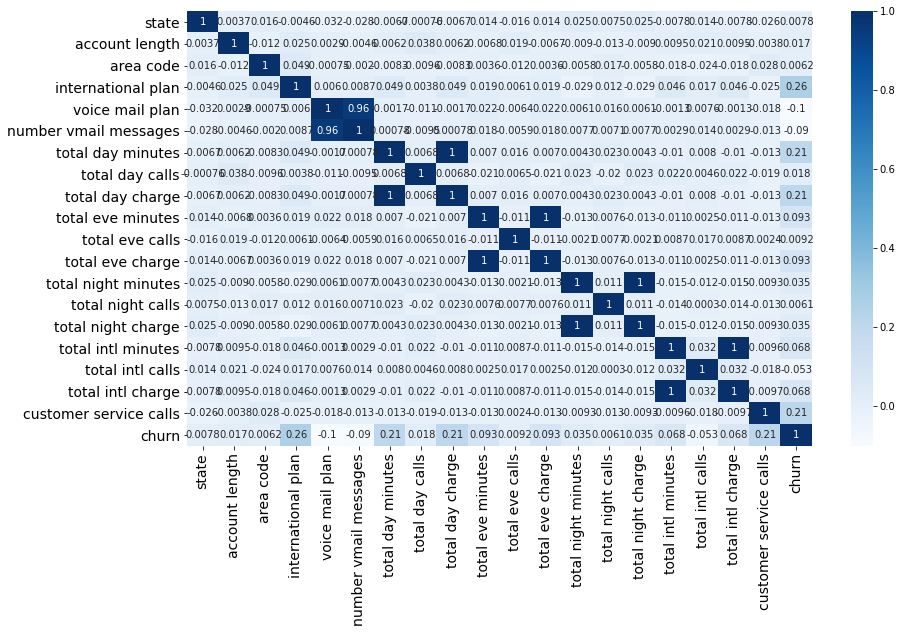

In [16]:
f,pp=plt.subplots(figsize=(14,8))
corrmat=data.corr(method='pearson')
ax=sns.heatmap(corrmat,annot=True,cmap='Blues')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
pp.tick_params(labelsize=14)

In [17]:
y=data['churn']
data=data.drop(['churn'],axis=1)

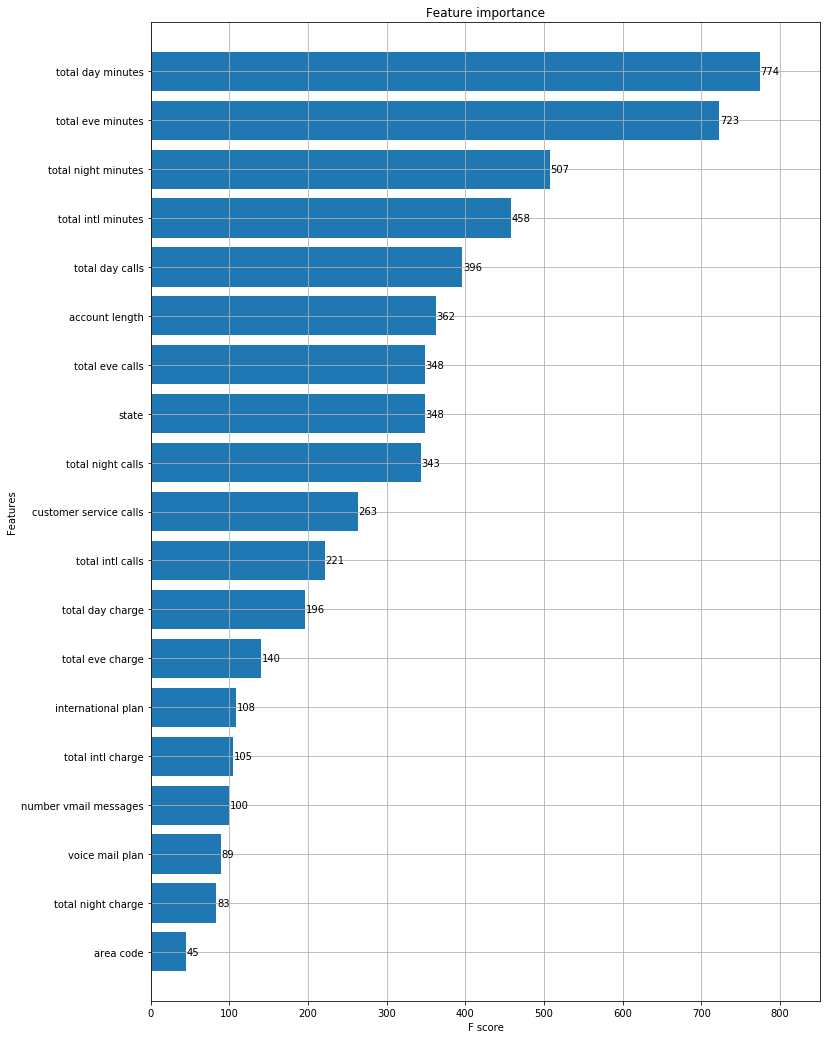

In [18]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(data, y)
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [19]:
X_train,X_test,y_train,y_test=train_test_split(data,y,stratify=y,random_state=0,shuffle=True)
print("Train Dataset",X_train.shape)
print("Test Dataset",X_test.shape)
print("Train Labels",y_train.shape)
print("Test Labels",y_test.shape)

Train Dataset (2499, 19)
Test Dataset (834, 19)
Train Labels (2499,)
Test Labels (834,)


In [20]:
clf=LogisticRegression(C=1.0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("roc_auc_score",roc_auc_score(y_test,y_pred))

accuracy_score 0.8585131894484412
roc_auc_score 0.5364134781449584


/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
lr = [clf.__class__,accuracy_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]

In [22]:
algo = pd.DataFrame([lr])

In [23]:
algo

,0,1,2
0,<class 'sklearn.linear_model._logistic.Logisti...,0.858513,0.536413


In [24]:
clf=xgb.XGBClassifier(max_depth=7,n_estimators=200,colsample_bytree=0.8,subsample=0.8,nthread=10,learning_rate=0.1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("auc",roc_auc_score(y_test,y_pred))
xg = [clf.__class__,accuracy_score(y_test,y_pred),roc_auc_score(y_pred,y_test)]

accuracy_score 0.9700239808153477
auc 0.9207109988061156


In [25]:
algo = algo.append([xg])

In [26]:
clf=MultinomialNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("auc",roc_auc_score(y_test,y_pred))
mnb = [clf.__class__,accuracy_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]

accuracy_score 0.6390887290167866
auc 0.5967857846603225


In [27]:
algo = algo.append([mnb])

In [28]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("auc",roc_auc_score(y_test, y_pred))
abc = [clf.__class__,accuracy_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]

accuracy_score 0.6390887290167866
auc 0.5967857846603225


In [29]:
algo = algo.append([abc])

In [30]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("auc",roc_auc_score(y_test,y_pred))
knc = [clf.__class__,accuracy_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]

accuracy_score 0.6390887290167866
auc 0.5967857846603225


In [31]:
algo = algo.append([knc])


In [32]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("auc",roc_auc_score(y_test,y_pred))
gbc = [clf.__class__,accuracy_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]

accuracy_score 0.6390887290167866
auc 0.5967857846603225


In [33]:
algo = algo.append([gbc])

In [34]:
clf = ExtraTreesClassifier()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("auc",roc_auc_score(y_test,y_pred))
etc = [clf.__class__,accuracy_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]

accuracy_score 0.6390887290167866
auc 0.5967857846603225


In [35]:
algo = algo.append([etc])

In [36]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("auc",roc_auc_score(y_test,y_pred))
dtc = [clf.__class__,accuracy_score(y_test, y_pred),roc_auc_score(y_test,y_pred)]

accuracy_score 0.6390887290167866
auc 0.5967857846603225


In [37]:
algo = algo.append([dtc])

In [38]:
algo.sort_values([1], ascending=[False])

,0,1,2
0,<class 'xgboost.sklearn.XGBClassifier'>,0.970024,0.955751
0,<class 'sklearn.linear_model._logistic.Logisti...,0.858513,0.536413
0,<class 'sklearn.naive_bayes.MultinomialNB'>,0.639089,0.596786
0,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.639089,0.596786
0,<class 'sklearn.neighbors._classification.KNei...,0.639089,0.596786
0,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.639089,0.596786
0,<class 'sklearn.ensemble._forest.ExtraTreesCla...,0.639089,0.596786
0,<class 'sklearn.tree._classes.DecisionTreeClas...,0.639089,0.596786
